In [1]:
  import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/data_penjualan.csv.xlsx', sheet_name='data_penjualan')

In [3]:
data_numerik = df[['Jumlah Order', 'Harga', 'Total']]

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerik)

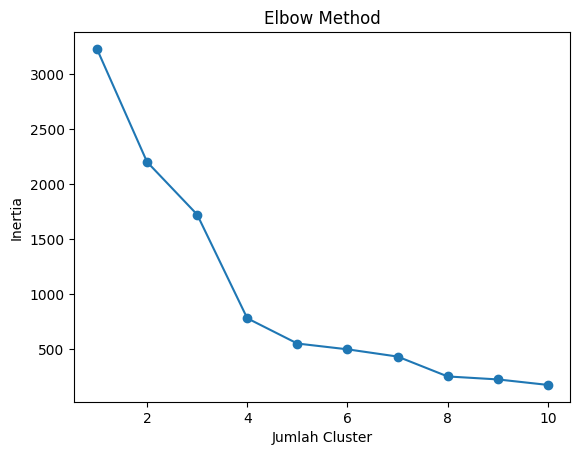

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

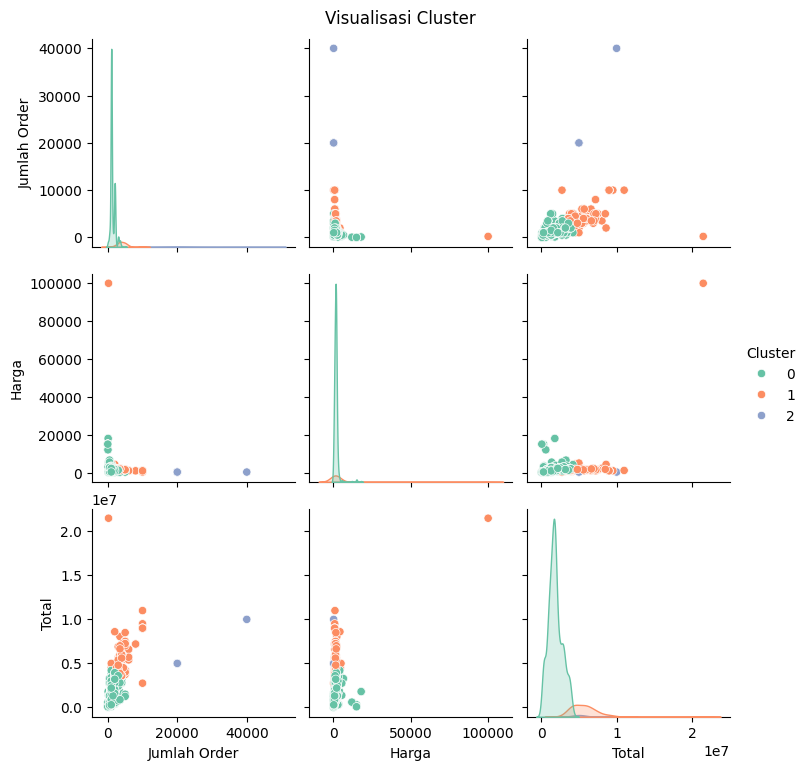

In [7]:
sns.pairplot(df, hue='Cluster', vars=['Jumlah Order', 'Harga', 'Total'], palette='Set2')
plt.suptitle("Visualisasi Cluster", y=1.02)
plt.show()

In [8]:
cluster_summary = df.groupby('Cluster')[['Jumlah Order', 'Harga', 'Total']].mean()
print(cluster_summary)

         Jumlah Order        Harga         Total
Cluster                                         
0         1324.751340  1652.624866  1.829305e+06
1         4346.325758  2186.515152  5.737641e+06
2        21818.181818   250.000000  5.454545e+06
